Objetivo é prever a rotatividade de clientes do Banco ABC.

In [2]:
# Manipulação de dados
import pandas as pd 
import numpy as np 
import sidetable as stb

import warnings
warnings.simplefilter('ignore')

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Funções estatisticas 
from scipy.stats import skew

# Configurações 
pd.set_option('display.max_rows', 22)
pd.set_option('display.max_columns', 40)
pd.set_option('display.precision', 2)

# Alterando parâmetros atuais(valores padrão) dos gráficos do matplotlib

co0 = 'black'
co1 = 'gray'
co2 = 'red'

plt.rcParams['axes.edgecolor'] = co1
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.titlecolor'] = co1
plt.rcParams['axes.labelcolor'] = co1
plt.rcParams['xtick.color'] = co1
plt.rcParams['xtick.direction'] = 'inout'
plt.rcParams['ytick.color'] = co1
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['legend.labelcolor'] = co1
plt.rcParams['figure.titlesize'] = 18
font_options = {'family': 'Arial', 'weight': 'normal', 'size': 10}
plt.rc('font', **font_options)

font_sup_title = {'family': 'Arial', 'color':'gray', 'size': 18}
font_title = {'family': 'Arial', 'color': 'gray', 'size': 16}
font_label = {'family': 'Arial', 'color': 'gray', 'size': 12}

type_bar = plt.rc_context({'axes.edgecolor': 'gray', 'xtick.color': 'gray', 'ytick.color': 'gray', 'figure.facecolor': 'white'})
type_two = plt.rc_context({'axes.edgecolor': 'red', 'xtick.color': 'red', 'ytick.color':'green', 'figure.facecolor': 'white'})

# Outros
cmap_blue = plt.get_cmap('Blues')
cmap_gray = plt.get_cmap('Greys')
cmap_orange = plt.get_cmap('Oranges')
cmap_greens = plt.get_cmap('Greens')

def format_pct(x:float, app)-> str:
    """Essa função transforma os valores decimais(entre 0 e 1) em porcentagem para um 
    "numero de casas decimais especificados 
    
    PARAMETERS:
        x(decimal): valor a ser convertido
        app(int): Numero de casas decimais após a virgula 
        
    RETURN:
    Retorna uma string com simbólo de porcentagem
    """
    try:
        return f'{x:.{app}%}'
    except ValueError:
        try:
            return f'{float(x):.{app}%}'
        except:
            print('A string não pode ser convertido')

tabela = pd.read_csv("BankCustomerChurnPrediction.csv")
tabela = tabela.drop("customer_id",axis=1)
display(tabela)

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
display(tabela.info())
tabela = tabela.dropna()
display(tabela.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


None

In [4]:
# 1 Passo analisar os clientes que estão ativos

tabela.query('active_member == 1').churn.value_counts(1).apply(lambda x: format_pct(x, 2))

churn
0    85.73%
1    14.27%
Name: proportion, dtype: object

In [5]:
# Quantos clientes sairam do banco

display(tabela["churn"].value_counts(normalize=True).map("{:.1%}".format))

churn
0    79.6%
1    20.4%
Name: proportion, dtype: object

In [6]:
tabela.groupby(['gender', 'churn']).agg({'churn': 'count'}).rename(columns={'churn': 'count'})

count
gender churn       
Female 0       3404
       1       1139
Male   0       4559
       1        898

In [7]:
age_min = tabela.age.min()
age_max = tabela.age.max()

print(f'Na nossa base de dados tem clientes cuja a idade tem {age_min} até {age_max} anos')

Na nossa base de dados tem clientes cuja a idade tem 18 até 92 anos


In [8]:
display(tabela['country'].value_counts(normalize=True).map("{:.1%}".format))

country
France     50.1%
Germany    25.1%
Spain      24.8%
Name: proportion, dtype: object

In [9]:
tabela.groupby(['country', 'churn']).agg({'churn': 'count'}).rename(columns={'churn': 'count'})

count
country churn       
France  0       4204
        1        810
Germany 0       1695
        1        814
Spain   0       2064
        1        413

In [10]:
tabela.groupby(['country', 'active_member']).agg({'active_member': 'count'}).rename(columns={'active_member': 'count'})

count
country active_member       
France  0               2423
        1               2591
Germany 0               1261
        1               1248
Spain   0               1165
        1               1312

In [11]:
saldo_min = tabela.balance.min()
saldo_max = tabela.balance.max()

print(f'Nossa base de dados contém clientes cuja salário varia de {saldo_min} até {saldo_max}')

Nossa base de dados contém clientes cuja salário varia de 0.0 até 250898.09


In [12]:
tabela.groupby(['balance', 'churn']).agg({'churn': 'count'}).rename(columns={'churn':'count'})

count
balance   churn       
0.00      0       3117
          1        500
3768.69   1          1
12459.19  1          1
14262.80  0          1
...                ...
216109.88 1          1
221532.80 0          1
222267.63 1          1
238387.56 1          1
250898.09 1          1

[6384 rows x 1 columns]

OBSERVAÇÕES:

1. Os membros ativos são de 51.5% ou seja tem mais clientes ativos que inativos 
2. Os clientes que não cancelaram são menores do que cancelaram o numero de mulheres que cancelou foi maior 
3. O banco se concentra em tres paises alemanha, frança, espanha
4. Tirei a coluna de customer_id por que ela não é relevante para análise 



In [13]:
# Percentual por gênero
tabela.gender.value_counts(normalize=True).apply(lambda x: format_pct(x, 2))

gender
Male      54.57%
Female    45.43%
Name: proportion, dtype: object

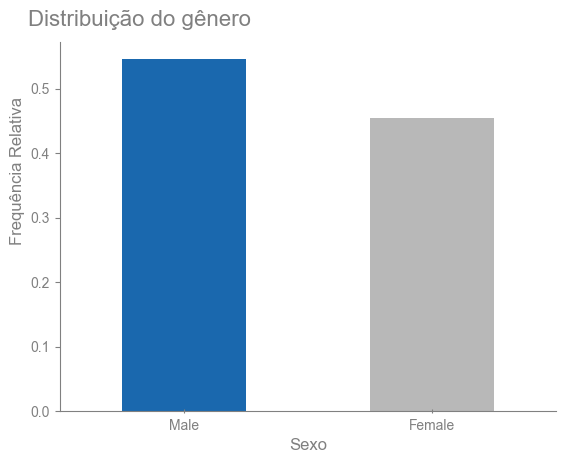

In [14]:
tabela.gender.value_counts(normalize=True).plot.bar(rot = 0, color=[cmap_blue(200), cmap_gray(100)])

pos_title = {'x':0.16, 'y':1.02}
pos_lable_y = {'x':0.15, 'y':0.65}

plt.title("Distribuição do gênero", fontdict=font_title, **pos_title)
plt.xlabel('Sexo', fontdict=font_label)
plt.ylabel('Frequência Relativa', fontdict=font_label, **pos_lable_y)

plt.show()

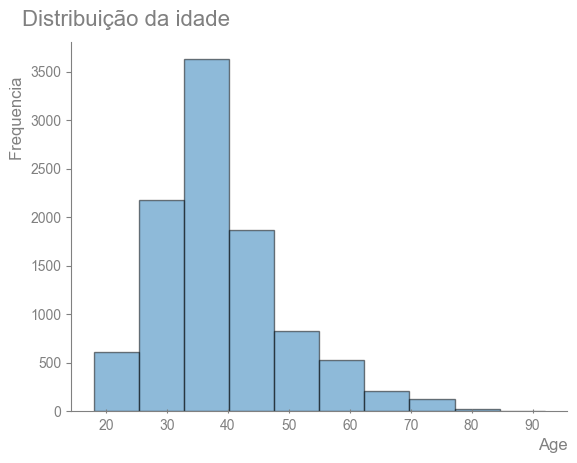

In [15]:
pos_label_x = {'x': 0.97, 'y':1.02}
pos_label_y = {'x':0., 'y': 0.8}
pos_title = {'x': 0.11, 'y': 1.02}

plt.hist(tabela.age, edgecolor='k', alpha=0.5)
plt.title("Distribuição da idade", fontdict=font_title, **pos_title)
plt.xlabel('Age', fontdict=font_label, **pos_label_x)
plt.ylabel('Frequencia ', fontdict=font_label, **pos_label_y)
plt.show()

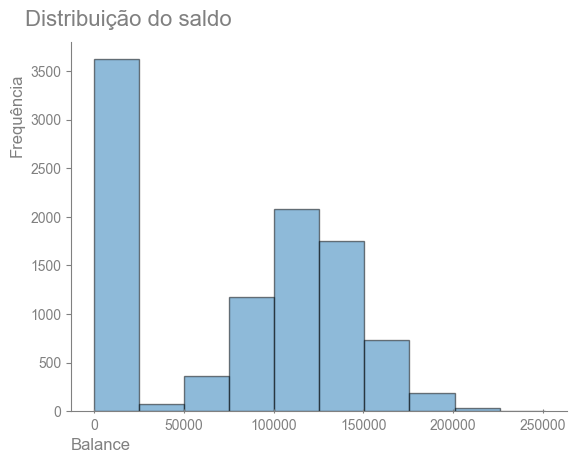

In [16]:
pos_label_x = {'x':0.06, 'y':1.02}
pos_label_y = {'x':0., 'y':0.8}
pos_title = {'x':0.115, 'y':1.02}

plt.hist(tabela.balance, edgecolor='k', alpha=0.5)
plt.title("Distribuição do saldo", fontdict=font_title, **pos_title)
plt.xlabel('Balance', fontdict=font_label, **pos_label_x)
plt.ylabel('Frequência', fontdict=font_label, **pos_label_y)
plt.show()

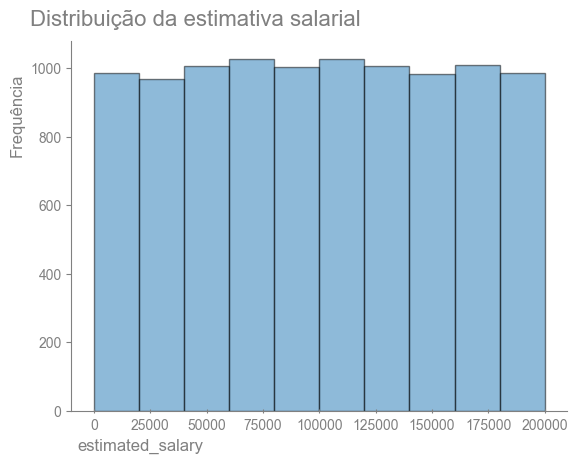

In [17]:
pos_label_x = {'x':0.14, 'y':1.02}
pos_label_y = {'x':0., 'y':0.8}
pos_title = {'x':0.25, 'y':1.02}

plt.hist(tabela.estimated_salary, edgecolor='k', alpha=0.5)
plt.title("Distribuição da estimativa salarial", fontdict=font_title, **pos_title)
plt.xlabel('estimated_salary', fontdict=font_label, **pos_label_x)
plt.ylabel('Frequência', fontdict=font_label, **pos_label_y)
plt.show()

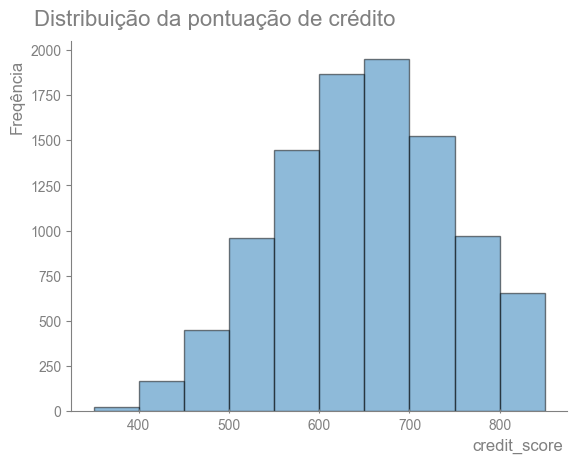

In [18]:
pos_label_x = {'x':0.9, 'y':1.02}
pos_label_y = {'x': 0., 'y':0.85}
pos_title = {'x': 0.29, 'y': 1.02}

plt.hist(tabela.credit_score, edgecolor='k', alpha=0.5)
plt.title("Distribuição da pontuação de crédito", fontdict=font_title, **pos_title)
plt.xlabel('credit_score', fontdict=font_label, **pos_label_x)
plt.ylabel('Freqência', fontdict=font_label, **pos_label_y)
plt.show()

OBSERVAÇÃO:
    Análisando os gráficos

1.Gender: A distribuição por genero é menor 

2.Balance: Temos muitas pessoas sem saldo na conta, pois temos uma distribuição assimétrica negativa(á esquerda). estiamted_salary: Possui uma distribuição aproximadamente uniforme.Isso significa que a probalidade de um cliente possuir uma estimativa salarial que estaja em qualquer uma das classes do histograma é praticamente a mesma pra todas elas 

3.Credit_score: Possui uma distribuição assimétrica negativa. Isso significa que a medida que o credit_score cresce, a freqência de clientes também tende a aumentar até o valor mediano. Após esse valor, ocorre decréscimos.Isso é bom, uma vez que a pontuação de crédito alta indica uma probabilidade de cliente pagar de o cliente em dia  


A estimativa salarial implica em maior saldo ou maior idade?

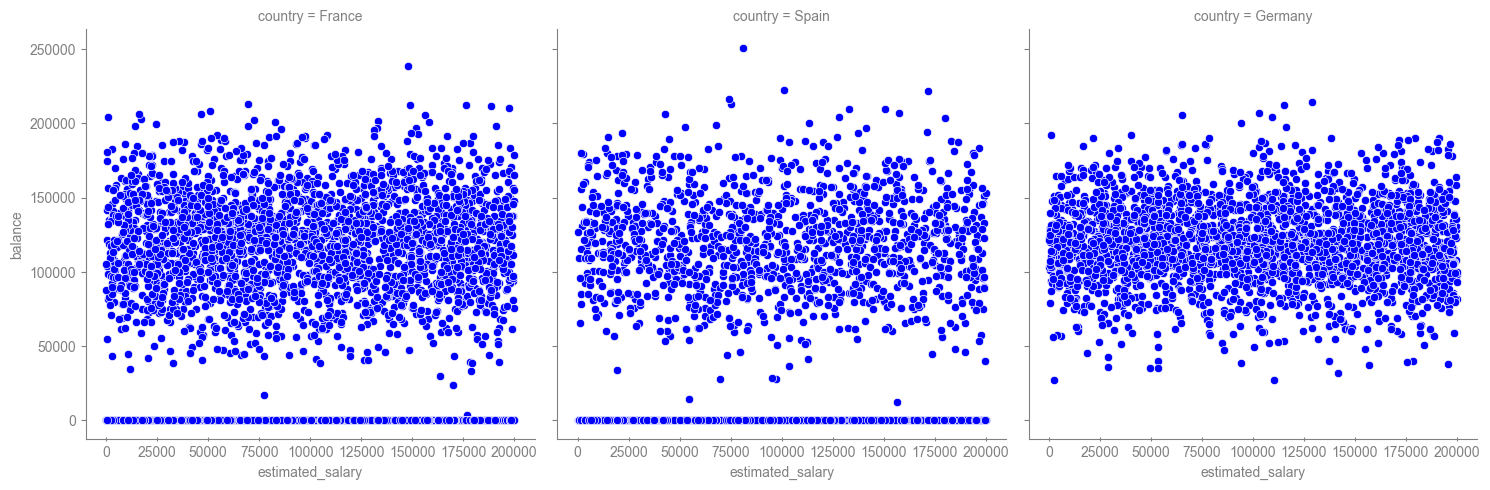

In [19]:
sns.relplot(x= 'estimated_salary', y='balance', data=tabela, col='country', color='b')
plt.show()

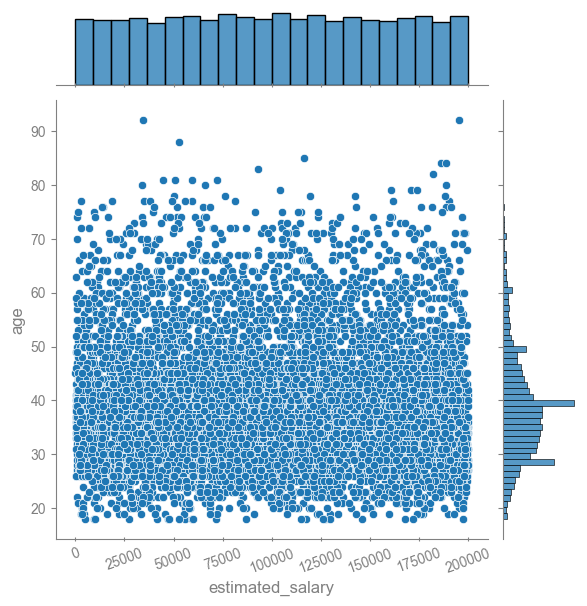

In [20]:
sns.jointplot(x='estimated_salary', y='age', data=tabela)
plt.xlabel('estimated_salary', fontdict=font_label)
plt.ylabel('age', fontdict=font_label)
plt.xticks(range(0,200001, 25000), rotation=20)
plt.show()

OBSERVAÇÕES:

1.Curiosamente, vemos que o aumento da estiva salarial não implica em maior saldo 

2.Nota-se também que o aumento da estimativa salarial não implica que o cliente terá uma idade mais alta 

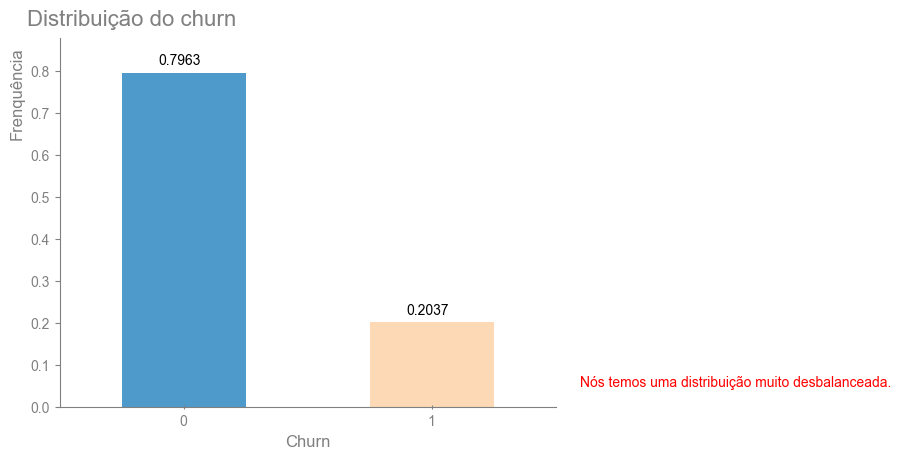

In [21]:
pos_title= {'x': 0.145, 'y':1.01}

tabela.churn.value_counts(1).plot.bar(rot = 0, color=[cmap_blue(150), cmap_orange(50)])
plt.title('Distribuição do churn', fontdict=font_title, **pos_title)
plt.xlabel('Churn', fontdict=font_label)
plt.ylabel('Frenquência', fontdict=font_label, **pos_label_y)
plt.text(-0.1, 0.815, tabela.churn.value_counts(1)[0])
plt.text(0.9, 0.22, tabela.churn.value_counts(1)[1])
plt.ylim(0, 0.88)
plt.text(1.6, 0.05, "Nós temos uma distribuição muito desbalanceada.", color='r')
plt.show()

In [22]:
# Sexo feminino
tabela.query("gender == 'Female'").churn.value_counts(1).apply(lambda x: format_pct(x, 2))


churn
0    74.93%
1    25.07%
Name: proportion, dtype: object

In [23]:
# Sexo masculino 
tabela.query("gender == 'Male'").churn.value_counts(1).apply(lambda x: format_pct(x, 2))

churn
0    83.54%
1    16.46%
Name: proportion, dtype: object

In [24]:
print('Possuem cartão de credito')
possuem_cc_churn = tabela.query('credit_card == 1').churn.value_counts(1).apply(lambda x: format_pct(x, 2))
display(possuem_cc_churn)

print('\n Não Possuem cartão de crédito')
n_possuem_cc_churn = tabela.query('credit_card == 0').churn.value_counts(1).apply(lambda x: format_pct(x, 2))
display(n_possuem_cc_churn)

Possuem cartão de credito


churn
0    79.82%
1    20.18%
Name: proportion, dtype: object


 Não Possuem cartão de crédito


churn
0    79.19%
1    20.81%
Name: proportion, dtype: object

In [25]:
print('Possuem cartão e são da França:')
print(tabela[(tabela['credit_card'] == 1) & (tabela['country'] == 'France')].churn.value_counts(1).apply(lambda x: format_pct(x, 2)))

# churn = 0 -> 2974
# churn = 1 -> 569

print('\n\nNão Possuem cartão e são da França:')
print(tabela[(tabela['credit_card'] == 0 ) & (tabela['country'] == 'Spain')].churn.value_counts(1).apply(lambda x: format_pct(x, 2)))

Possuem cartão e são da França:
churn
0    83.94%
1    16.06%
Name: proportion, dtype: object


Não Possuem cartão e são da França:
churn
0    82.14%
1    17.86%
Name: proportion, dtype: object


In [26]:
tabela[['credit_score', 'country', 'churn']].groupby(['country', 'churn']).agg({'credit_score': 'mean'}).unstack()

credit_score        
churn              0       1
country                     
France        651.16  641.91
Germany       653.26  647.69
Spain         652.10  647.48

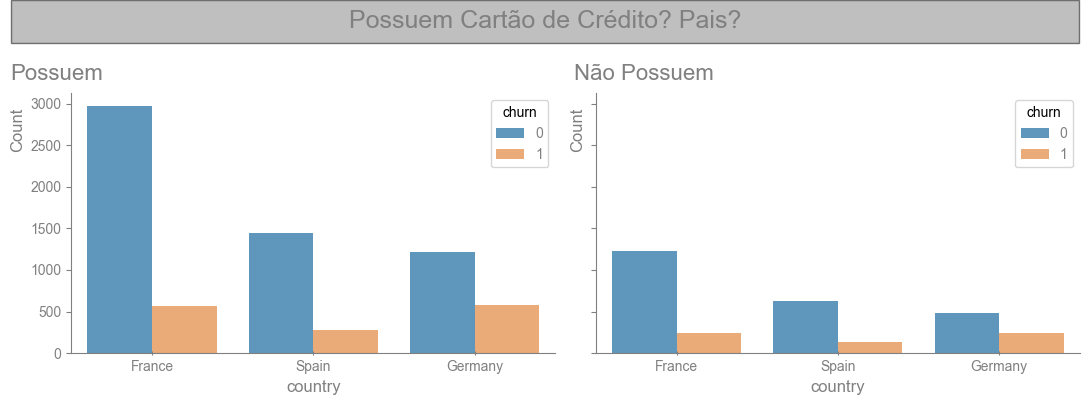

In [27]:
pos_label_y = {'y': 0.86}
pos_title_1 = {'x': -0.03, 'y': 1.02}
pos_title_2 = {'x': 0.1, 'y': 1.02}
pos_sup_title = {'x': 0.5, 'y': 1.0, 'size':18}
bbox = {'facecolor': 'gray', 'alpha': 0.5, 'pad': 10}

order_by = ['France', 'Spain', 'Germany']
order_color = [cmap_blue(150), cmap_orange(100)]

# Criação dos plot e ajuste do sup_title
fig, ax = plt.subplots(1,2, figsize=(11, 4), sharey=True)
sup_title = plt.suptitle('Possuem Cartão de Crédito? Pais?', fontdict=font_sup_title, bbox=bbox, **pos_sup_title)
sup_title._bbox_patch._mutation_aspect = 0.03
sup_title.get_bbox_patch().set_boxstyle("square", pad=13.5)

# plot 1
sns.countplot(data=tabela.query('credit_card == 1'), x='country', hue='churn', order=order_by, palette=order_color, ax=ax[0])
ax[0].set_title("Possuem", fontdict=font_title, **pos_title_1)
ax[0].set_xlabel('country', fontdict=font_label)
ax[0].set_ylabel('Count', fontdict=font_label, **pos_label_y)

#plot 2
sns.countplot(data=tabela.query('credit_card == 0'), x='country', hue='churn', order=order_by, palette=order_color, ax=ax[1])
ax[1].set_title("Não Possuem", fontdict=font_title, **pos_title_2)
ax[1].set_xlabel('country', fontdict=font_label)
ax[1].set_ylabel('Count', fontdict=font_label, **pos_label_y)

# ajuste nos plots 
plt.tight_layout()
plt.subplots_adjust(hspace=0.8)
plt.show()


OBSERVAÇÕES:

1.Analisando a coluna churn, percebe-se que ela tem uma distribuição muito desbalanceada

2.Aparetemente, as mulheres são mais propensas a cancelaram suas contas com o banco 

3.Em termos ralativos, a taxa de churn para os clientes que possuem ou não cartão de crédito é, aproximadamente, igual. cerca de 20%. Isso mostra que, possuir ou não cartão de crédito, aparentemente, não faz com que os clientes deixem o banco

4.Analisando por país, vale destacar que na alemanha é onde ocorre a maior taxa de churn, seja para os clientes que possua ou não cartão de crédito 


In [28]:
tabela[['credit_score', 'country', 'churn']].groupby(['country', 'churn']).agg({'credit_score': 'mean'}).unstack()

credit_score        
churn              0       1
country                     
France        651.16  641.91
Germany       653.26  647.69
Spain         652.10  647.48

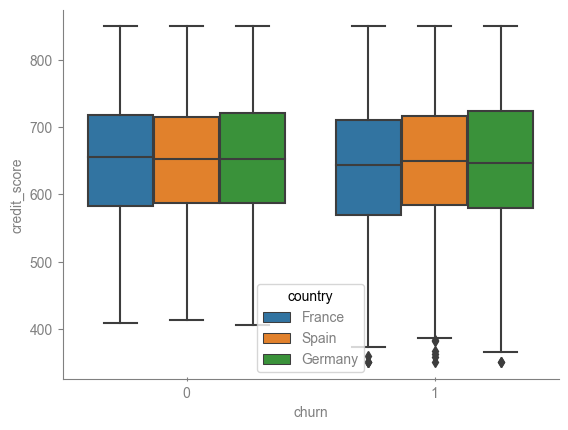

In [29]:
sns.boxplot(data=tabela, x='churn', y='credit_score', hue='country')
plt.show()

OBSERVAÇÃO:

1.Aparentemente, o credit_score não tem relação com o churn.Analisando o bloxplot gerado acima, percebe-se que a média do credit_score das pessoas que deixaram o banco e das que deixaram é aproximadamente igual 

In [30]:
tabela_product= tabela.groupby(['products_number', 'churn']).agg({'churn': 'count'}).rename(columns={'churn': 'frequência'})
display(tabela_product)

taxa_tabela_product1 = tabela_product.loc[(1,1)][0]/(tabela_product.loc[(1,1)][0] + tabela_product.loc[(1,0)][0])
taxa_tabela_product2 = tabela_product.loc[(2,1)][0]/(tabela_product.loc[(2,1)][0] + tabela_product.loc[(2,0)][0])
taxa_tabela_product3 = tabela_product.loc[(3,1)][0]/(tabela_product.loc[(3,1)][0] + tabela_product.loc[(3,0)][0])
taxa_tabela_product4 = tabela_product.loc[(4,1)][0]/(tabela_product.loc[(4,1)][0])

print(f'taxa de tabela de 1 ponto: {taxa_tabela_product1:.2%}')
print(f'taxa de tabela de 2 ponto: {taxa_tabela_product2:.2%}')
print(f'taxa de tabela de 3 ponto: {taxa_tabela_product3:.2%}')
print(f'taxa de tabela de 4 ponto: {taxa_tabela_product4:.2%}')



frequência
products_number churn            
1               0            3675
                1            1409
2               0            4242
                1             348
3               0              46
                1             220
4               1              60

taxa de tabela de 1 ponto: 27.71%
taxa de tabela de 2 ponto: 7.58%
taxa de tabela de 3 ponto: 82.71%
taxa de tabela de 4 ponto: 100.00%


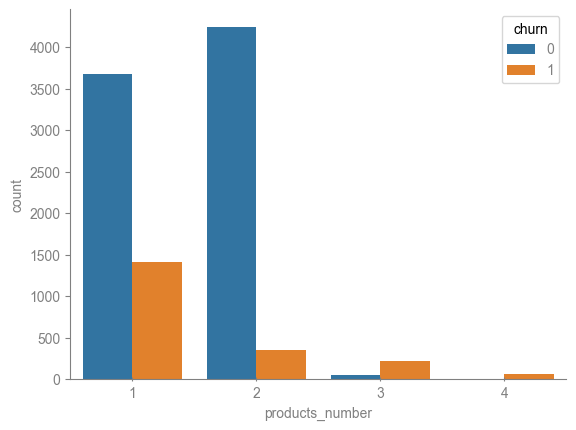

In [31]:
sns.countplot(data=tabela, x='products_number', hue='churn')
plt.show()

OBSERVAÇÕES:

1.Normalmente os clientes consomem 1 ou 2 produtos do banco. Entretando, quem consome um produto tem uma taxa de churn maior 
que a dos clientes que consome dois produtos.Vale destacar, que os clientes que consomem dois produtos estão em maior quantidade em ternis absoluto, di que quem consome a penas um

2.A frequência de clientes que consome quatro produtos do banco de é a menor.Além disso, a taxa de churn desses clientes foi 100%

3. Os clientes que consomem três produtos, tambem está está e menor quantidade.Além disso, possui a segunda maior taxa de churn, cerca de 82,71%


In [32]:
#Membors que não estão ativos

tabela.query('active_member == 0').churn.value_counts(1).apply(lambda x: format_pct(x, 2))

churn
0    73.15%
1    26.85%
Name: proportion, dtype: object

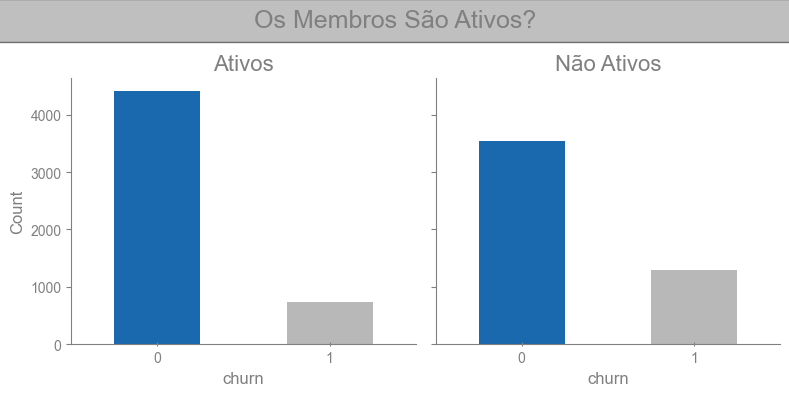

In [33]:
pos_sup_title = {'x': 0.5, 'y':1.02, 'size':18, 'edgecolor':'gray'}
bbox = {'facecolor': 'gray', 'alpha': 0.5, 'pad': 10}


fig, ax = plt.subplots(1,2, figsize=(8,4), sharey=True)
sup_title = plt.suptitle('Os Membros São Ativos?', fontdict=font_sup_title, bbox=bbox)
sup_title._bbox_patch._mutation_aspect = 0.03
sup_title.get_bbox_patch().set_boxstyle("square", pad=13)

# plot 1
tabela.query('active_member == 1').churn.value_counts().plot.bar(ax=ax[0], color=[cmap_blue(200), cmap_gray(100)], rot=0)
ax[0].set_title("Ativos", fontdict=font_title)
ax[0].set_xlabel('churn', fontdict=font_label)
ax[0].set_ylabel('Count', fontdict=font_label)

# plot 2
tabela.query('active_member == 0').churn.value_counts().plot.bar(ax=ax[1], color=[cmap_blue(200), cmap_gray(100)], rot=0)
ax[1].set_title("Não Ativos", fontdict=font_title)
ax[1].set_xlabel('churn', fontdict=font_label)
ax[1].set_ylabel('Count', fontdict=font_label)

# ajustes nos plots
plt.tight_layout()
plt.subplots_adjust(hspace=0.8)
plt.show()

In [34]:
df_tabela = tabela.copy()
df_tabela['active_member'] = df_tabela['active_member'].replace({0:'N', 1: 'Y'})
df_tabela['churn'] = df_tabela['churn'].replace({0:'N', 1:'Y'})
(df_tabela.replace()).groupby(['country', 'active_member', 'churn']).agg({'churn':'count'}).rename(columns={'churn':'frequência'})

frequência
country active_member churn            
France  N             N            1911
                      Y             512
        Y             N            2293
                      Y             298
Germany N             N             743
                      Y             518
        Y             N             952
                      Y             296
Spain   N             N             893
                      Y             272
        Y             N            1171
                      Y             141

In [35]:
taxa_churn_N_Y_alemanha = 518/(518 + 743)
print(f'Taxa de churn da Alemanha : {taxa_churn_N_Y_alemanha:.2%}')

Taxa de churn da Alemanha : 41.08%


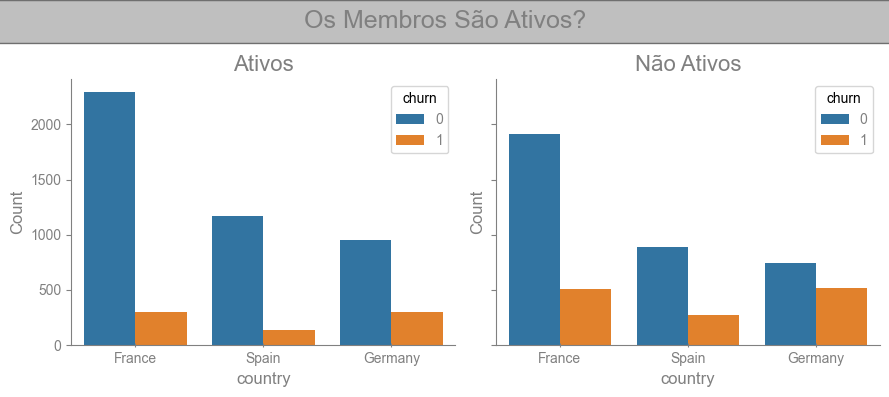

In [37]:
pos_sup_title = {'x': 0.5, 'y':1.02, 'size':18, 'edgecolor':'gray'}
bbox = {'facecolor': 'gray', 'alpha': 0.5, 'pad': 10}

fig, ax = plt.subplots(1,2, figsize=(9,4), sharey=True)
sup_title = plt.suptitle('Os Membros São Ativos?', fontdict=font_sup_title, bbox=bbox)
sup_title._bbox_patch._mutation_aspect = 0.03
sup_title.get_bbox_patch().set_boxstyle("square", pad=13)

# plot 1
sns.countplot(data=tabela.query('active_member == 1'), x='country', hue='churn', ax=ax[0])
ax[0].set_title("Ativos", fontdict=font_title)
ax[0].set_xlabel('country', fontdict=font_label)
ax[0].set_ylabel('Count', fontdict=font_label)

# plot 2
sns.countplot(data=tabela.query('active_member == 0'), x='country', hue='churn', ax=ax[1])
ax[1].set_title("Não Ativos", fontdict=font_title)
ax[1].set_xlabel('country', fontdict=font_label)
ax[1].set_ylabel('Count', fontdict=font_label)

# ajustes nos plots
plt.tight_layout()
plt.subplots_adjust(hspace=0.8)
plt.show()

OBSERVAÇÕES:

1.Para os membros que são ativos, a taxa de churn é menor, aproximadamente 14%.Diferentemente dos não ativos, que possui uma taxa de churn de aproximadamente 26%.Uma boa ideia seria indentificar alguma medida para manter os membros ativos 

2.Na alemanha, a taxa de churn relativa tanto para membros ativos e não ativos é maior. A taxa de churn dos membros não ativos é cerca de 41%.Seria legal elaborar uma estratégia para tornar os membros da Alemanha mais ativos e verificar se diminuiria a taxa de churn

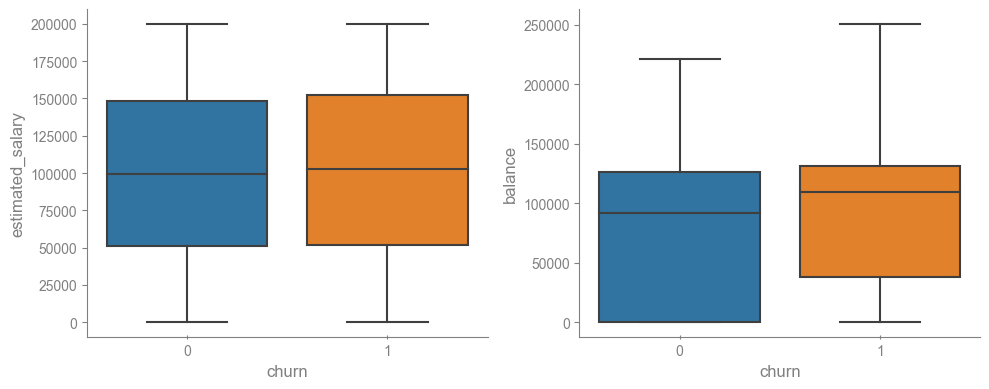

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.boxplot(data=tabela, x = 'churn', y='estimated_salary', ax=ax[0])
ax[0].set_xlabel('churn', fontdict=font_label, color='gray')
ax[0].set_ylabel('estimated_salary', fontdict=font_label)

sns.boxplot(data=tabela, x = 'churn', y='balance', ax=ax[1])
ax[1].set_xlabel('churn', fontdict=font_label, color='gray')
ax[1].set_ylabel('balance', fontdict=font_label)

fig.tight_layout()
plt.show()

OBSERVAÇÕES:

1.Aparentemente, o salário não é um bom preditor de churn 

2.Por outro lado, parece que o saldo tem alguma relação comchurn. As pessoas que dão churn possuem saldo maior do que quem não de churn 

In [41]:
tabela.groupby('churn')['balance'].median()

churn
0     92072.68
1    109349.29
Name: balance, dtype: float64

In [43]:
tabela.groupby('churn').agg({'balance': ['mean', 'median']})

balance           
           mean     median
churn                     
0      72745.30   92072.68
1      91108.54  109349.29

In [44]:
agg_func = {
    'estimated_salary':['min', 'median', 'mean', 'std', skew],
    'balance':['min', 'median', 'mean', 'std', skew],
    'age':['min', 'median', 'mean', 'std', skew]
}

tabela.groupby('churn').agg(agg_func) 

estimated_salary                                       balance  \
                   min     median       mean       std  skew     min   
churn                                                                  
0                90.07   99645.04   99738.39  57405.59  0.01     0.0   
1                11.58  102460.84  101465.68  57912.42 -0.03     0.0   

                                           age                             
          median      mean       std  skew min median   mean    std  skew  
churn                                                                      
0       92072.68  72745.30  62848.04 -0.05  18   36.0  37.41  10.13  1.38  
1      109349.29  91108.54  58360.79 -0.51  18   45.0  44.84   9.76  0.08

In [45]:
tabela.groupby('country')['churn'].value_counts()

country  churn
France   0        4204
         1         810
Germany  0        1695
         1         814
Spain    0        2064
         1         413
Name: count, dtype: int64

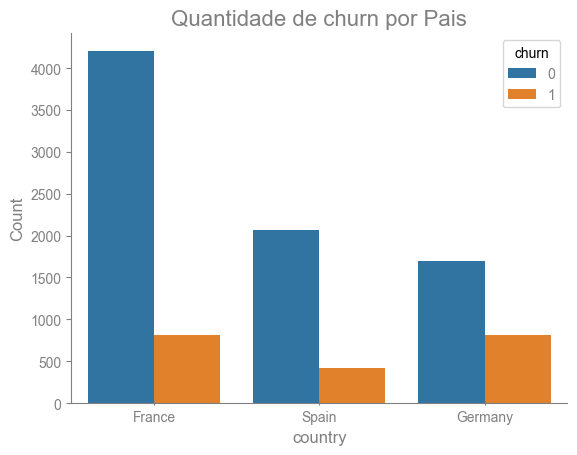

In [46]:
sns.countplot(data=tabela, x='country', hue='churn')
plt.title("Quantidade de churn por Pais", fontdict=font_title)
plt.xlabel('country', fontdict=font_label)
plt.ylabel('Count', fontdict=font_label)
plt.show()

In [49]:
tabela.groupby('country')['churn'].mean().sort_values()

country
France     0.16
Spain      0.17
Germany    0.32
Name: churn, dtype: float64

Quem possui conta no banco acima de 5 anos, possui uma menor taxa de churn, quando comparado a quem possui menos?

In [51]:
tabela.query('tenure >= 5').churn.value_counts(1).apply(lambda x: format_pct(x, 2))

churn
0    80.15%
1    19.85%
Name: proportion, dtype: object

In [52]:
tabela.query('tenure < 5').churn.value_counts(1).apply(lambda x: format_pct(x, 2))

churn
0    78.99%
1    21.01%
Name: proportion, dtype: object

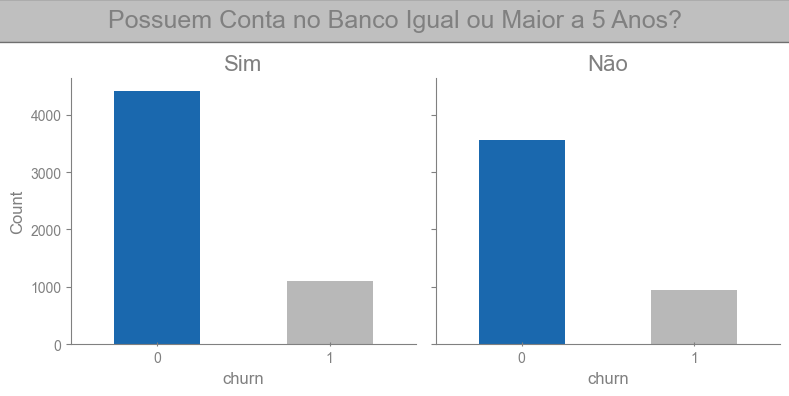

In [54]:
pos_sup_title = {'x': 0.5, 'y':1.02, 'size':18,  'edgecolor': 'gray'}
bbox = {'facecolor': 'gray', 'alpha': 0.5, 'pad':10}

fig, ax = plt.subplots(1, 2, figsize=(8,4), sharey=True)
sup_title = plt.suptitle('Possuem Conta no Banco Igual ou Maior a 5 Anos?', fontdict=font_sup_title, bbox=bbox)
sup_title._bbox_patch._mutation_aspect = 0.03
sup_title.get_bbox_patch().set_boxstyle("square", pad=13)

# plot 1
tabela.query('tenure >= 5').churn.value_counts().plot.bar(ax=ax[0], color=[cmap_blue(200), cmap_gray(100)], rot=0)
ax[0].set_title("Sim", fontdict=font_title)
ax[0].set_xlabel('churn', fontdict=font_label)
ax[0].set_ylabel('Count', fontdict=font_label)

# plot 2
tabela.query('tenure < 5').churn.value_counts().plot.bar(ax=ax[1], color=[cmap_blue(200), cmap_gray(100)], rot=0)
ax[1].set_title("Não", fontdict=font_title)
ax[1].set_xlabel('churn', fontdict=font_label)
ax[1].set_ylabel('Count', fontdict=font_label)

# ajustes nos plots

plt.tight_layout()
plt.subplots_adjust(hspace=0.8)
plt.show()

In [56]:
tabela.query('tenure >= 5 & active_member == 1').churn.value_counts(1).apply(lambda x: format_pct(x, 2))

churn
0    86.25%
1    13.75%
Name: proportion, dtype: object

In [57]:
tabela.query('tenure >= 5 & active_member == 0').churn.value_counts(1).apply(lambda x: format_pct(x, 2))

churn
0    73.93%
1    26.07%
Name: proportion, dtype: object

In [58]:
tabela.query('tenure < 5 & active_member == 1').churn.value_counts(1).apply(lambda x: format_pct(x, 2))

churn
0    85.12%
1    14.88%
Name: proportion, dtype: object

In [59]:
tabela.query('tenure < 5 & active_member == 0').churn.value_counts(1).apply(lambda x: format_pct(x, 2))

churn
0    72.15%
1    27.85%
Name: proportion, dtype: object

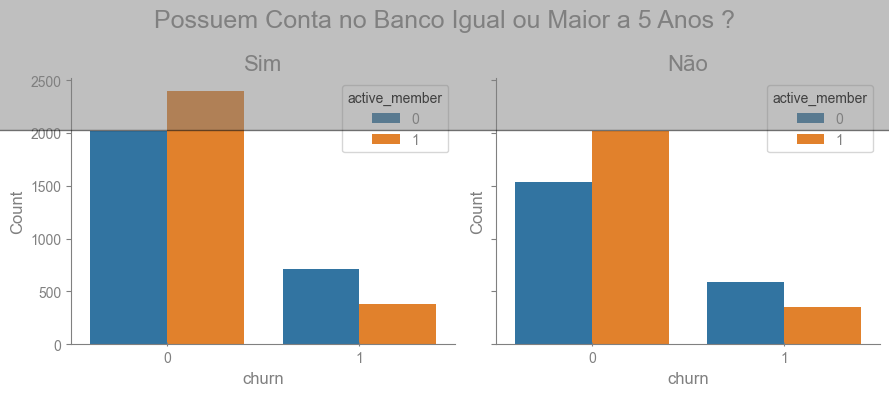

In [65]:
pos_sup_title = {'x': 0.5, 'y': 1.02, 'size': 18, 'edgecolor': 'gray'}
bbox = {'facecolor': 'gray', 'alpha': 0.5, 'pad': 10}

fig, ax = plt.subplots(1,2, figsize=(9,4), sharey=True)
sup_title  = plt.suptitle('Possuem Conta no Banco Igual ou Maior a 5 Anos ?', fontdict=font_sup_title, bbox=bbox)
sup_title._bbox_patch._mutation_aspect = 0.3
sup_title.get_bbox_patch().set_boxstyle("square", pad=13)

# plot 1 

sns.countplot(data=tabela.query('tenure >= 5'), x='churn', hue='active_member', ax=ax[0])
ax[0].set_title("Sim", fontdict=font_title)
ax[0].set_xlabel('churn',fontdict=font_label)
ax[0].set_ylabel('Count', fontdict=font_label)

# plot 2 
sns.countplot(data=tabela.query('tenure < 5'), x='churn', hue='active_member', ax=ax[1])
ax[1].set_title("Não", fontdict=font_title)
ax[1].set_xlabel('churn', fontdict=font_label)
ax[1].set_ylabel('Count', fontdict=font_label)

# ajustes nos plots 

plt.tight_layout()
plt.subplots_adjust(hspace=0.8)
plt.show()

OBSERVAÇÕES:

1.Aparentemnte, clientes que possuem conta a mais tempo no banco, possuem menor taxa de churn

2.Os clientes que possui conta há mais no banco e são ativos, são os que menos cancelam suas contas. Possuem taxa de churn
aproximadamente 13,7%

Saldo igual a zero, impplica em mais churn? e das pessoas que possuem saldo maior que zero?


In [69]:
customer_balance_0 = len(tabela.query('balance == 0'))
total_customer = len(tabela)
p_sem_saldo = customer_balance_0/total_customer
print(f'Sem saldo: {p_sem_saldo:.2%}')

Sem saldo: 36.17%


In [73]:
tabela_sem_saldo = tabela.query('balance == 0').churn.value_counts(1).apply(lambda x: format_pct(x, 2))

print(f'Dos {p_sem_saldo:.2%} de clientes sem saldo:')
print(f' * {tabela_sem_saldo.loc[0]} não deram churn')
print(f' * {tabela_sem_saldo.loc[1]} deram churn')

Dos 36.17% de clientes sem saldo:
 * 86.18% não deram churn
 * 13.82% deram churn


In [75]:
tabela_tem_saldo = tabela.query('balance > 0').churn.value_counts(1).apply(lambda x: format_pct(x, 2))

print(f'Dos {1 - p_sem_saldo:.2%} de clientes que possui saldo maior que zero: ')
print(f' * {tabela_tem_saldo.loc[0]} não deram churn')
print(f' * {tabela_tem_saldo.loc[1]} deram churn')

Dos 63.83% de clientes que possui saldo maior que zero: 
 * 75.92% não deram churn
 * 24.08% deram churn


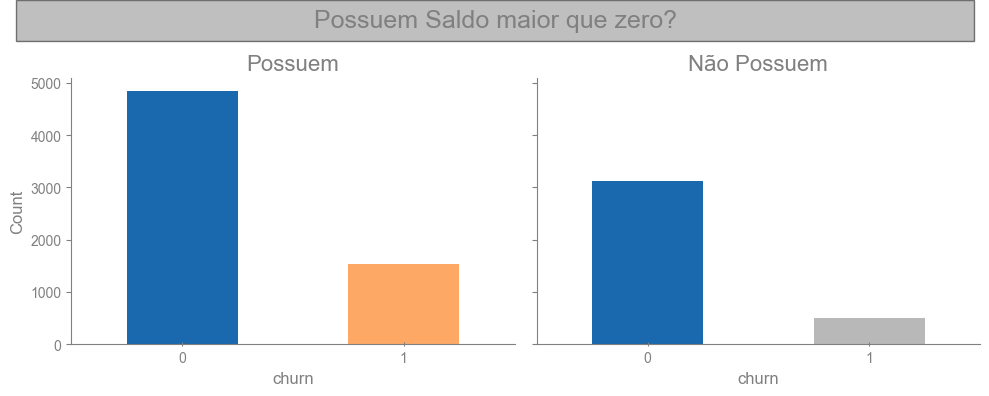

In [79]:
pos_title_1 = {'x': -0.03, 'y': 1.02}
pos_title_2 = {'x': 0.003, 'y': 1.02}
pos_sup_title = {'x': 0.5, 'y': 1.02, 'size':18, 'edgecolor': 'gray'}
bbox  ={'facecolor': 'gray', 'alpha': 0.5, 'pad': 10}

fig, ax= plt.subplots(1,2, figsize=(10, 4), sharey=True)
sup_title = plt.suptitle('Possuem Saldo maior que zero?', fontdict=font_sup_title, bbox=bbox)
sup_title._bbox_patch._mutation_aspect = 0.03
sup_title.get_bbox_patch().set_boxstyle("square", pad=11.9)

# plot 1
tabela.query('balance > 0').churn.value_counts().plot.bar(ax=ax[0], color=[cmap_blue(200), cmap_orange(100)], rot=0)
ax[0].set_title("Possuem", fontdict=font_title)
ax[0].set_xlabel('churn', fontdict=font_label)
ax[0].set_ylabel('Count', fontdict=font_label)

# plot 2 

tabela.query('balance == 0').churn.value_counts().plot.bar(ax=ax[1], color=[cmap_blue(200), cmap_gray(100)],rot=0)
ax[1].set_title("Não Possuem", fontdict=font_title)
ax[1].set_xlabel('churn', fontdict=font_label)
ax[1].set_ylabel('Count', fontdict=font_label)

# ajustes nos plots

plt.tight_layout()
plt.subplots_adjust(wspace=0.05)
plt.show()

OBSERVAÇÕES:
1.Temos 36.17% de nossos clientes não tem saldo 

2.Curiosamente, a taxa de churn dos clientes que não possuem saldo é menor do que a taxa de churn dos clientes que possuem saldo maior que zero 

CONCLUSÃO:

A análise feita buscou entender quais as variaveis que estão relacionadas ao churn.

.Vimos que clientes com saldo maior estão mais propensos ao churn

.Curiosamente, vemos que o aumento da estimativa salarial não implica em maior saldo

.Nota-se também que, o aumento da estimativa salarial não implica que o cliente terá uma idade avançada 

.Dos clientes que possuem cartão de crédito e são Alemanha, aproximadamente 32% deixaram o banco. Enquanto os que são da França e possuem cartão de crédito, aproximadamente 16% delas deixaram o banco. Vale apena destacar que os cliente que possuem cartão de crédito e são da França é mais que o dobro da Alemanha. Porém, em termos absolutos, o números de churn na alemanha é maior que na França.Seria muito interassante verificar e comparar as característica da França coma as da Alemanha

.Em termos ralativos, a situação das pessoas que não possuem cartão e é de tal pais, é aproximadamente, igual a situação das pessoas que possuem cartão

.Analisando a variável churn, percebe-se que ela tem um distribuição muito desbalanceada.O que pode afetar um possivel que tenha como variável alvo o churn

.Clientes mais velhos tendem a cancelarem sua conta com o banco

.A taxa de churn para o sexo feminino é maior que no masculino.

.Em termos relativos, a atxa de churn para os clientes que possuem ou não cartão de crédito é, aproximadamente, igual. Cerca de 20%. Isso mostra que, possuir ou não cartão de crédito, aparentemente, não faz com que os clientes deixem o banco 

.Analisando por pais, vale destacar que na Alemanha é onde ocorre a maior taxa de churn, seja para os clientes que possuem ou não cartão de crédito

.Aparentemente, o credit_score não tem relação com o churn 

.Normalmente os clientes consomem um ou dois produtos do banco.Entretanto, quem consome um porduto 

.A frequência de clientes que consome quatro produtos do Bancp é a menor.Além disso,a taxa de churn desses clientes foi 100%.Seria interessante verifica isso 

.Os clientes que consomem três produtos, também está em menor quantidade.Além disso, possui a segunda maior taxa de churn, cerca de 82.71%

.Para os membros que são ativos,a taxa de churn é menor, aproximadamente 14%.Diferentemente dos não ativos, que possui uma taxa de churn de aproximadamente 26%. Uma boa ideia seria indentificar alguma medida para manter os membros ativos 

.Na alemanha, a taxa de churn relativa tanto para membros ativos e não ativos é maior.A taxa de churn dos membros não ativos é cerca de 41%.Seria legal elaborar uma estratégia para tornar os membros da Alemanha mais ativos e verificar se diminuiria a taxa de churn

.Aparentemente, o salário não é um bom preditor de churn 

.Na Alemanha é onde ocorre o maior de churn. O que será que pode está afetando aoopção do banco nesse país? Como foi visto no inicio, alguns dos fatores que podem afetar o churn éa insatisfação de cliente, concorrentes, a quantidade do produto e entre outros fatores.Uma análise nesse sentido seria interessante 

.A taxa de churn dos clientes que não possuem saldo é menor que a taxa de churn dos clientes que possuem saldo maior que zero

.Aparentemente, clientes que possuem conta a mais tempo no banco, possuem menor atxa de churn

.Os clientes que possui conta há mais tempo no banco e são ativos, são os que menos cancelam suas contas.Possuem taxa de churn aproximadamente 13,7%